C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


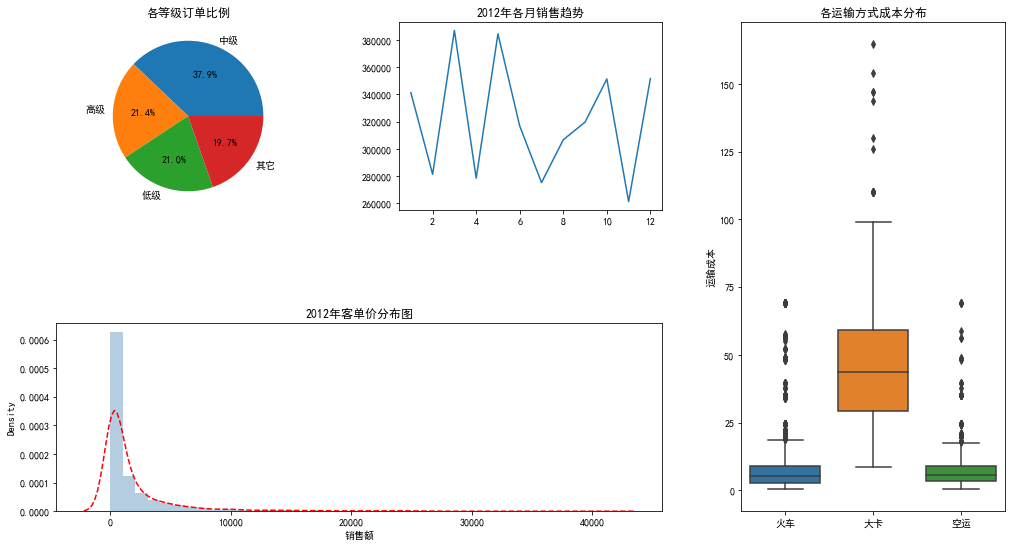

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Trade = pd.read_excel(r'.\data\Prod_Trade.xlsx')

#设置子图布局
plt.figure(figsize=(17,9))
ax1 = plt.subplot2grid(shape=(2,3),loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,3),loc=(0,1))
ax3 = plt.subplot2grid(shape=(2,3),loc=(0,2),rowspan=2)
ax4 = plt.subplot2grid(shape=(2,3),loc=(1,0),colspan=2)

plt.rcParams['font.family']=['SimHei']

#提取出年份和月份字段
Trade['year']=Trade.Date.dt.year
Trade['month']=Trade.Date.dt.month

#统计2012年各订单等级的数量
Class_Counts = Trade.Order_Class[Trade.year==2012].value_counts()
Class_Percent = Class_Counts/Class_Counts.sum()

#绘制订单等级饼图
ax1.pie(x=Class_Counts,labels = Class_Percent.index,autopct='%.1f%%')
#添加标题
ax1.set_title('各等级订单比例')

#统计2012年每月销售额
Month_Sales = Trade[Trade.year==2012].groupby(by='month').agg({'Sales':np.sum})
# Month_Sales.pivot_table(index='month',values='Sales',aggfunc==np.sum)

#绘制销售额趋势图
Month_Sales.plot(title = '2012年各月销售趋势', ax = ax2, legend = False)
#删除X轴标签
ax2.set_xlabel('')

#绘制各运输方式的成本箱线图
sns.boxplot(x='Transport',y='Trans_Cost',data=Trade,ax=ax3)
#添加标题
ax3.set_title('各运输方式成本分布')
#删除x轴标签
ax3.set_xlabel('')
#设置y轴标签
ax3.set_ylabel('运输成本')

# 设置第四个子图的布局

# 2012年各单价分布直方图
sns.distplot(Trade.Sales[Trade.year == 2012], bins = 40, norm_hist = True, ax = ax4, hist_kws = {'color':'steelblue'}, kde_kws=({'linestyle':'--', 'color':'red'}))
# 添加标题
ax4.set_title('2012年各单价分布图')
# 修改x轴标签
ax4.set_xlabel('销售额')

# 调整子图之间的水平间距和高度间距
plt.subplots_adjust(hspace=0.6, wspace=0.3)
# 图形显示
plt.show()